In [ ]:
import torch
import torch.nn as nn

In [ ]:
prediction = torch.randn(4,5)

In [ ]:
label = torch.randn(4,5)

#https://pytorch.org/docs/stable/nn.html#loss-functions

In [ ]:
# mse = nn.MSELoss(size_average=None, reduce=None, reduction='mean')

mse = torch.nn.MSELoss(reduction='none')
loss= mse(prediction,label)
loss

tensor([[1.3622e+00, 2.4310e-01, 2.4901e-01, 1.9410e+01, 3.9469e+00],
        [1.5208e-01, 7.7559e+00, 5.7191e-06, 2.9380e+00, 4.8132e+00],
        [2.9459e-01, 1.4257e+00, 6.0614e+00, 1.0792e+00, 8.7212e+00],
        [1.3915e+01, 5.2556e+00, 4.3401e-01, 8.6157e+00, 1.2673e+00]])

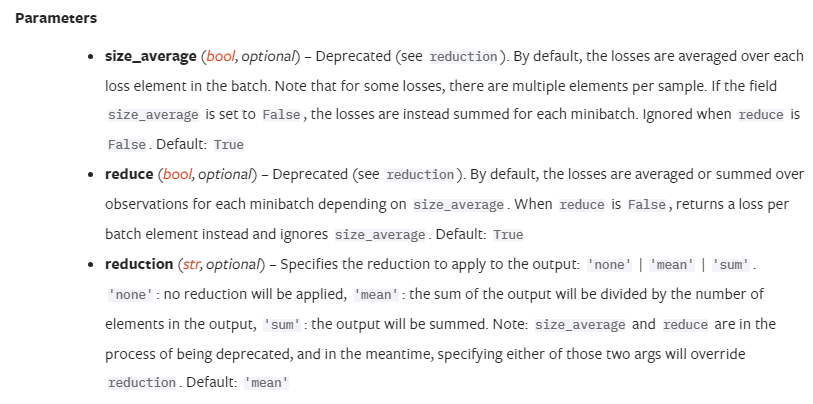

In [ ]:
mse = torch.nn.MSELoss(reduction='sum')
loss= mse(prediction,label)
loss

In [ ]:
mse = torch.nn.MSELoss(reduction='mean')
loss= mse(prediction,label)
loss

tensor(4.3971)

In [ ]:
#((x-y)**2).mean()
((prediction-label)**2).mean()

tensor(4.3971)

In [ ]:
prediction # 预测张量

tensor([[-1.4689,  0.7504, -1.9959,  1.4395, -0.7424],
        [-0.6842,  2.0814, -0.0348,  0.8641, -0.4565],
        [ 0.4369,  1.0789, -1.8452, -0.8302,  1.5946],
        [-0.5439,  0.3313,  0.1107,  1.0320,  1.6962]])

In [ ]:
#现在让我们创建一个标签张量。所以请记住，因为我们使用的是二元交叉熵，我们的标签应该是 0 或 1。
# label = nn.zeros(4,5) #这里这只有0, 1要怎么办呢?
# random_ 是来自离散均匀分布,用采样的数字填充张量

#首先我们来检查一下它是否是相同的形状。所以你去看文档，往下走，你可以看到目标具有与输入相同的形状。
##https://pytorch.org/docs/stable/generated/torch.Tensor.random_.html

label = torch.zeros(4,5).random_(0,2)
label

tensor([[1., 1., 0., 1., 1.],
        [0., 1., 0., 0., 0.],
        [0., 1., 1., 0., 0.],
        [0., 0., 1., 1., 0.]])

In [ ]:
# 现在我们意识到我们要使用二元交叉熵损失而不是带有 logits 的二元交叉熵损失。
# 因此我们需要定义一个 S 型层，将我们的预测张量传递给它
# 因为这是二元交叉熵损失需要你的输入预测是介于 0 和 1 之间。
# 因此我们只需定义一个 S 型层。我们可以通过 en.sigmoid() 来做到这一点
sigmoid = nn.Sigmoid()

In [ ]:
# nn.BCELoss(weight=None, reduction='mean')

# weight=None：这是一个可选参数，用于指定每个样本的权重。如果设置为 None，则所有样本的权重相等。
# reduction='mean'：这是一个可选参数，用于指定如何计算最终的损失值。'mean' 表示对所有样本的损失取平均值。其他可选值包括 'sum'（对所有样本的损失求和）和 'none'（不进行任何归约，返回每个样本的损失）。

# 这里的权重基本上是手动调整的权重考虑到每个批次元素的损失。所以它必须是 nbatch 形状。张量必须不符合 nbatch 形状。这个张量批次中每个元素应该有权重,
# 假设你想赋予更多权重,批次中的特定元素比其他元素更受关注，然后你将分配一个手动张量，其中包括批次中每个元素的权重，然后将这个张量传递给你的损失函数。

bce=nn.BCELoss(reduction='mean')

In [ ]:
bce(sigmoid(prediction),label)

tensor(0.7971)

In [ ]:
bces=nn.BCEWithLogitsLoss(reduction='mean')
bces(prediction,label)

tensor(0.7971)

In [ ]:
print(prediction,'\n',label)

tensor([[-1.4689,  0.7504, -1.9959,  1.4395, -0.7424],
        [-0.6842,  2.0814, -0.0348,  0.8641, -0.4565],
        [ 0.4369,  1.0789, -1.8452, -0.8302,  1.5946],
        [-0.5439,  0.3313,  0.1107,  1.0320,  1.6962]]) 
 tensor([[1., 1., 0., 1., 1.],
        [0., 1., 0., 0., 0.],
        [0., 1., 1., 0., 0.],
        [0., 0., 1., 1., 0.]])


In [ ]:
 # normally using pyTorch to do but how about in pure Python only?
import numpy as np
x= prediction.numpy()
y=label.numpy()
print(x,'\n',y)

[[-1.4688587   0.75044864 -1.995937    1.4394644  -0.7423967 ]
 [-0.6841881   2.0813732  -0.03475335  0.86410415 -0.45649546]
 [ 0.43688998  1.0788728  -1.8451943  -0.8302375   1.5946004 ]
 [-0.54388356  0.33132097  0.11067749  1.0320226   1.6961924 ]] 
 [[1. 1. 0. 1. 1.]
 [0. 1. 0. 0. 0.]
 [0. 1. 1. 0. 0.]
 [0. 0. 1. 1. 0.]]


In [ ]:
x

array([[-1.4688587 ,  0.75044864, -1.995937  ,  1.4394644 , -0.7423967 ],
       [-0.6841881 ,  2.0813732 , -0.03475335,  0.86410415, -0.45649546],
       [ 0.43688998,  1.0788728 , -1.8451943 , -0.8302375 ,  1.5946004 ],
       [-0.54388356,  0.33132097,  0.11067749,  1.0320226 ,  1.6961924 ]],
      dtype=float32)

In [ ]:
#converts prediction tensor to 0-1
# if forget to do this, your result in next two cell will be 0
#can use sigmoid function to get 0-1
def sigmoid(x):
    return 1/(1+np.exp(-x))

In [ ]:
sigmoid(x)

array([[0.18711613, 0.67927647, 0.11963018, 0.80837166, 0.3224803 ],
       [0.33532718, 0.8890796 , 0.4913125 , 0.70351744, 0.38781753],
       [0.6075177 , 0.7462806 , 0.13643812, 0.30359486, 0.8312624 ],
       [0.36728466, 0.5820808 , 0.5276412 , 0.73730785, 0.84503675]],
      dtype=float32)

In [ ]:
x=sigmoid(x)
loss_values=[]
for i in range(len(y)): # rows number to loop
    batch_loss = []
    for j in range(len(y[0])): # colmn number to loop
        if y[i][j]==1:
            loss = -np.log(x[i][j]) #回想一下二元交叉熵，当你的标签为 1 时，它基本上是 -log x, 当标签为 0 时，为 -log 1-x。
        else:
            loss = -np.log(1-x[i][j])
        batch_loss.append(loss)

    loss_values.append(batch_loss)
print(np.mean(loss_values))

0.797147411592288


In [ ]:
# above can change as below
loss_values=[]
for i in range(len(y)): # rows number  to loop
    batch_loss = []
    for j in range(len(y[0])): # colmn number to loop
        batch_loss.append(-np.log(x[i][j]) if y[i][j]==1 else -np.log(1-x[i][j]))

    loss_values.append(batch_loss)

print(np.mean(loss_values))

0.797147411592288


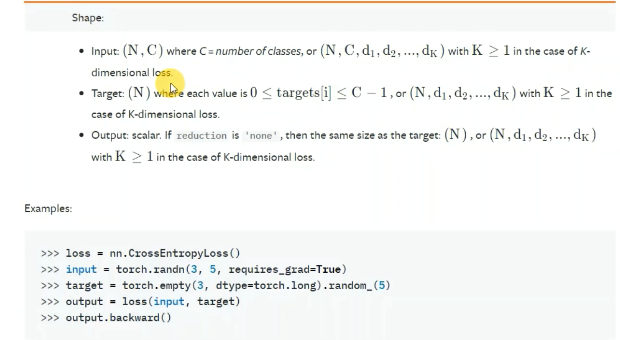

如果我们从实际执行的角度来说，那么你必须提供你的目标(target),作为长张量(long tensor)的指标。
所以你不必提供one-hot vector，正如我们所了解的，交叉熵损失将标签(label)作为一个one-hot vector。
在 PyTorch 中，你不必提供one-hot vector，你只需提供具体指数(specific index)，它会自动转换,将此索引转换为one-hot vector

正如您所看到的，这是一个例子。您的输入是 3 乘以 5。这是你的输入，N 乘以 C，其中 C 是类别的数量。并且您的目标形状与您的输入不同。
所以它不是 N 乘以 C，它只是 N，通常在其他框架中，您可以将其作为 N 乘以 C 来提供。
在这里你将找到你的目标作为一个独热向量，所以在 PyTorch 中，他们为你简化了它。你不必提供它以one-hot vector的形式。
所以它不必与您的输入的形状相同。你只能将其作为一维张量提供，其中包括标签的索引,对于批次中的每个元素。它会自动转换它
为你提供一个one-hot vector。

假设你有一个识别猫和狗的应用程序，猫的索引是0，狗的索引是1。使用批次大小为3时，输入的形状为3乘2（3个样本，每个样本有2个类别）。目标标签是一维张量，包含每个样本的正确类别索引。PyTorch会自动将这些索引转换为独热向量

你使用的批次大小是3。
所以你的输入将是3乘2。
为什么是3，因为你的批次大小是3，而你有2个类别，猫和狗。
而你的目标将是一个形状为N的一维张量。所以你只有N个元素，即3个。

那么这些索引是什么？我的意思是正确类别的索引。假设你的批次中的第一个元素是猫，第二个元素也是猫，第三个元素是狗。
因为我们给猫分配了标签0，给狗分配了标签1，所以基本上你的目标将是一个包含元素0, 0, 1的张量。
0代表猫，1代表狗。
PyTorch会做的是，它会取这个张量，取这个张量的每个索引，并将其转换为独热向量。
这里告诉你，每个值在0到C-1之间。在我们猫和狗的例子中，C是2。
所以2-1是1，所以你的目标应该在0和1之间。
为什么是C-1，
因为我们从0开始，这就是原因。

1. 具体例子：识别猫和狗的应用程序，猫的索引是0，狗的索引是1。
2. 输入形状：批次大小为3，输入形状为3乘2。
3. 目标标签形状：目标标签是一维张量，形状为N（批次大小）。
4. 索引转换：PyTorch会自动将目标标签的索引转换为独热向量。
5. 索引范围：目标标签的索引值在0到C-1之间（C是类别数量）。